### TODOS

- [ ] add dataset name to joined dataset
- [ ] Remove names from everything except first 2 turns
- [ ] end chat token should be loss making
- [ ] add thought section instructions to non-loss
- [x] make samantha dialog longer
- [x] add instructions like, keep it conversational. write small outputs. give detailed answer

### New Datasets

- [x] lukasmoeller/sail_preprocessed
- [x] sl-alex/openai-prm800k-stepwise-best
- [x] metaeval/reclor
- [x] glaiveai/glaive-function-calling
- [x] spencer/dialogsum_reformat
- [x] heliosbrahma/mental_health_chatbot_dataset
- [x] nbertagnolli/counsel-chat
- [x] NEG NEG glaiveai/glaive-function-calling

- [x] skeskinen/TinyStories-Instruct-hf
- [x] jkhedri/psychology-dataset
- [x] tiedong/goat
- [x] Jellywibble/dalio_handwritten-conversations
- [x] stacked-summaries/stacked-samsum-1024
- [x] shahules786/orca-best
- [x] https://uwnlp.github.io/storycommonsense/
- [x] https://github.com/wenhuchen/Time-Sensitive-QA/tree/main/dataset
- [x] griffin/chain_of_density
- [x] v2ray/airoboros-2.2-dealignment (filtered)
- [x] whitefox44/ReflectionGPT4
- [x] Villian7/Emotions_Data
- [x] allenai/soda
- [x] https://github.com/OFA-Sys/ExpertLLaMA
- [x] openbmb/UltraFeedback
- [x] LDJnr/Verified-Camel
- [x] LDJnr/Pure-Dove
- [x] ehartford/samantha-data philosophy conversations
- [x] THUDM/AgentInstruct

- [ ] nRuaif/Long-instructions
- [ ] allenai/peer_read
- [ ] nampdn-ai/tiny-codes
- [ ] roneneldan/TinyStories
- [ ] sail/symbolic-instruction-tuning
- [ ] open-phi/textbooks

### Postponed

- [ ] remove unused tokens
- [ ] filter using alpagasus
- [ ] add everything then tag and rate
- [ ] Add I should “think” about this before answering to the prompts for rows with chain of thought turns
- [ ] psychology textbooks
- [ ] obligation stack
- [ ] fix calendar dataset
- [ ] Add InsTagger tags

### Additional interesting datasets
- beliefbank https://arxiv.org/abs/2109.14723
- facebook/belebele (cross lang)
- taesiri/arxiv_qa
- chats-bug/agent_action_plan
- jane conversations
- hypnotherapy
- jane blog posts
- BarDa https://docs.google.com/spreadsheets/d/1__NmJMUnIhAIBzjZTO5vqBQQu_eZfzCCrU5orGRnMgY/edit#gid=578952663
- pietrolesci/dialogue_nli

In [1]:
from datasets import concatenate_datasets, load_dataset

# source names
sources = dict(
    #############################
    ### SAMANTHA DIALOG STYLE ###
    #############################

    camel="diwank/camel-subjects",
    dolly_orca="diwank/samantha-dolly-v2-orca",
    gpt4="diwank/samantha-gpt4-llm-cleaned-2k",
    lima="diwank/samantha-lima-2k",
    therapy="diwank/samantha-therapy",
    debater_evidence="diwank/samantha-debate-evidence",
    debater_argq="diwank/samantha-debate-argq",
    function_explanation="diwank/samantha-function-explanation",
    counsel_chat="diwank/samantha-counsel-chat",
    dalio="diwank/samantha-dalio-chatml",
    psychology_data="diwank/samantha-psychology-data",
    intent="diwank/samantha-intent",
    dialog="diwank/samantha-movie-dialog-4k",
    philosophy="diwank/samantha-philosophy-chatml",
    calendar="diwank/samantha-calendar-v2",

    ##############
    ### OTHERS ###
    ##############
    
    prm800k="diwank/prm800k-chatml",
    openbookqa="diwank/openbookqa_chatml",
    gpt_roleplay_realm="diwank/gpt_roleplay_realm-chatml",
    coqa="diwank/coqa-chatml",
    daily_dialog="diwank/daily_dialog-chatml",
    ambig_qa="diwank/ambig_qa-chatml",
    reclor="diwank/reclor-chatml",
    glaive="diwank/glaive-chatml",
    glaive_neg="diwank/glaive-neg-chatml",
    glaive_neg_neg="diwank/glaive-neg-neg-chatml",
    sail="diwank/sail_preprocessed-chatml",
    tinystories="diwank/tinystories-chatml",
    goat="diwank/goat-chatml",
    stacked_samsum="diwank/stacked-samsum-chatml",
    orca_best="diwank/orca_best_one_each-chatml",
    storycommonsense="diwank/storycommonsense-chatml",
    chain_of_density="diwank/chain_of_density-chatml",
    time_sensitive_qa="diwank/time_sensitive_qa-chatml",
    dealignment="diwank/dealignment-chatml",
    reflection_gpt4="diwank/reflection_gpt4-chatml",
    emotions_data="diwank/emotions_data-chatml",
    expertllama="diwank/expertllama-chatml",
    airoboros_filtered="diwank/airoboros-filtered",
    soda="diwank/soda-chatml",
    ultrafeedback="diwank/ultrafeedback-chatml",
    verified_camel="diwank/verified-camel-chatml",
    pure_dove="diwank/pure-dove-chatml",
    agent_instructions="diwank/agent_instructions-chatml",
    
    ###
    # Pending TODOs
    jokes="diwank/jokes-dataset",

    #############
    
    ###############
    ### Removed ###
    ###############

    # Removed in favor of glaive
    # airoboros_agent="diwank/airoboros-agent",
    
    # Removed in favor of alpaca-gpt4
    # chatalpaca="diwank/chatalpaca-20k-chatml",

    # Removed in favor of stacked samsum
    # samsum="diwank/samantha-samsum", # Move summarization to thought/information only
    # dialogsum="spencer/dialogsum_reformat",

    # Poor quality
    # self_aware="diwank/samantha-self_aware-chatml",
    
    # Really poor quality; should be removed
    # bluemoon_fandom="diwank/bluemoon-pruned-chatml",

    # Toolformer is shit compared to airoboros agent and glaive
    # toolformer="diwank/samantha-toolformer-dataset",

)

datasets = {
    name: load_dataset(source)
    for name, source in sources.items()
}

datasets = {
    name: concatenate_datasets([
        dataset[split]
        for split in list(dataset.keys())
    ])
    for name, dataset in datasets.items()
}


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/5601 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1667 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/25921 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/877 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/95 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/4065 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1718 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/23128 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/2768 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/2775 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/69 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/2324 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/3267 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/409 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/427 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/34 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/332 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/111 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/2199 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/106 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1021 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/82 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating en split:   0%|          | 0/4536 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/7199 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/11118 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/10036 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2002 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/9276 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/41767 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1348 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1348 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/52002 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/52 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/6652 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/58884 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/328906 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/14738 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/768 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/2562 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/12378 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2570 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1813 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/99 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/55814 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/52002 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/25714 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/8337 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/127 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/3857 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1866 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/15051 [00:00<?, ? examples/s]

In [3]:
assistant_me_map = {
    "user": "person",
    "assistant": "me",
}

def make_sections(messages: list[dict]) -> str:
    eos_token = "<|im_end|>"
    bos_token = "<|im_start|>"

    result = bos_token + (eos_token+'\n'+bos_token).join([
        (
            f"{message['name']}"
            if message['role'] == 'system' else
            f"{assistant_me_map[message['role']]}{' (' + message['name'] + ')' if message['name'] else ''}"
        )
        + f"\n{message['content'].strip()}"
        for message in messages
    ]) + eos_token
    
    return result
    

def transform_to_prompt_response(sample):

    prompt_chatml = sample["prompt_chatml"]
    response_chatml = sample["response_chatml"]
    
    prompt = make_sections(prompt_chatml)
    response = make_sections([response_chatml])
    
    [response_prefix, *rest_response] = response.split('\n')
    prompt += response_prefix + '\n'
    response = '\n'.join(rest_response)
    
    return dict(
        prompt=prompt,
        response=response,
    )

def calc_tokens(row):
    from transformers import AutoTokenizer

    tokenizer = AutoTokenizer.from_pretrained("julep-ai/StableBeluga-13B", use_fast=True, legacy=False)

    prompt = row['prompt']
    response = row['response']

    token_count = len(tokenizer.encode(prompt + response))
    return dict(token_count=token_count)

should_split = lambda section: (
    section["role"] == "assistant"
    or (
        section["role"] == "system"
        and section["name"] == "thought"
    )
)

def create_splits(chatml):
    split_idxs = [i for i, m in enumerate(chatml) if should_split(m)]

    splits = [
        (chatml[:idx], chatml[idx])
        for idx in split_idxs
    ]
    
    return splits


def batch_split(rows):
    chatmls = rows["chatml"]
    split_pairs = [
        # (p, r)
        splits
        for chatml in chatmls
        for splits in create_splits(chatml)
        # for (p, r) in splits
    ]

    prompt_chatmls, response_chatmls = zip(*split_pairs)
    
    return dict(
        prompt_chatml=list(prompt_chatmls),
        response_chatml=list(response_chatmls),
        chatml=[None] * len(prompt_chatmls),
    )


In [3]:
# long_datasets = {
#     name: dataset.remove_columns(list(set(dataset.column_names) - {"chatml"})).map(
#         batch_split, batched=True
#     ).map(
#         transform_to_prompt_response
#     ).map(
#         calc_tokens, num_proc=200,
#     ).filter(
#         lambda row: 1024 <= row["token_count"] <= 8092
#     )
    
#     for name, dataset in datasets.items()
# }

# long_dataset_lens = {
#     name: len(dataset)
#     for name, dataset in long_datasets.items()
# }
# long_dataset_lens

Loading cached processed dataset at /home/diwank/.cache/huggingface/datasets/diwank___parquet/diwank--samantha-dolly-v2-orca-27e2b1a8d6f6ded9/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-f503fd355eab2bc3.arrow
Loading cached processed dataset at /home/diwank/.cache/huggingface/datasets/diwank___parquet/diwank--samantha-dolly-v2-orca-27e2b1a8d6f6ded9/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-ce6021534a9e05cc.arrow
Loading cached processed dataset at /home/diwank/.cache/huggingface/datasets/diwank___parquet/diwank--samantha-dolly-v2-orca-27e2b1a8d6f6ded9/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-2046c55c33ce39ce_*_of_00200.arrow
Loading cached processed dataset at /home/diwank/.cache/huggingface/datasets/diwank___parquet/diwank--samantha-dolly-v2-orca-27e2b1a8d6f6ded9/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-ff0d49cb2e6fbbef.arrow
Loading cached proces

Map:   0%|          | 0/15051 [00:00<?, ? examples/s]

Map:   0%|          | 0/30134 [00:00<?, ? examples/s]

Map (num_proc=200):   0%|          | 0/30134 [00:00<?, ? examples/s]

Filter:   0%|          | 0/30134 [00:00<?, ? examples/s]

Loading cached processed dataset at /home/diwank/.cache/huggingface/datasets/diwank___parquet/diwank--openbookqa_chatml-18501a332577d024/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-e571333e616fad06.arrow
Loading cached processed dataset at /home/diwank/.cache/huggingface/datasets/diwank___parquet/diwank--openbookqa_chatml-18501a332577d024/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-6889a0621c304f47.arrow


Map (num_proc=200):   0%|          | 0/2418 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2418 [00:00<?, ? examples/s]

Map:   0%|          | 0/25714 [00:00<?, ? examples/s]

Map:   0%|          | 0/25714 [00:00<?, ? examples/s]

Map (num_proc=200):   0%|          | 0/25714 [00:00<?, ? examples/s]

Filter:   0%|          | 0/25714 [00:00<?, ? examples/s]

Map:   0%|          | 0/5601 [00:00<?, ? examples/s]

Map:   0%|          | 0/33897 [00:00<?, ? examples/s]

Map (num_proc=200):   0%|          | 0/33897 [00:00<?, ? examples/s]

Filter:   0%|          | 0/33897 [00:00<?, ? examples/s]

Map:   0%|          | 0/25921 [00:00<?, ? examples/s]

Map:   0%|          | 0/114702 [00:00<?, ? examples/s]

Map (num_proc=200):   0%|          | 0/114702 [00:00<?, ? examples/s]

Filter:   0%|          | 0/114702 [00:00<?, ? examples/s]

Map:   0%|          | 0/43 [00:00<?, ? examples/s]

Map:   0%|          | 0/307 [00:00<?, ? examples/s]

Map (num_proc=200):   0%|          | 0/307 [00:00<?, ? examples/s]

Filter:   0%|          | 0/307 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/224 [00:00<?, ? examples/s]

Map (num_proc=200):   0%|          | 0/224 [00:00<?, ? examples/s]

Filter:   0%|          | 0/224 [00:00<?, ? examples/s]

Map:   0%|          | 0/877 [00:00<?, ? examples/s]

Map:   0%|          | 0/3374 [00:00<?, ? examples/s]

Map (num_proc=200):   0%|          | 0/3374 [00:00<?, ? examples/s]

Filter:   0%|          | 0/3374 [00:00<?, ? examples/s]

Map:   0%|          | 0/4536 [00:00<?, ? examples/s]

Map:   0%|          | 0/19522 [00:00<?, ? examples/s]

Map (num_proc=200):   0%|          | 0/19522 [00:00<?, ? examples/s]

Filter:   0%|          | 0/19522 [00:00<?, ? examples/s]

Map:   0%|          | 0/7199 [00:00<?, ? examples/s]

Map:   0%|          | 0/217294 [00:00<?, ? examples/s]

Map (num_proc=200):   0%|          | 0/217294 [00:00<?, ? examples/s]

Filter:   0%|          | 0/217294 [00:00<?, ? examples/s]

Map:   0%|          | 0/13118 [00:00<?, ? examples/s]

Map:   0%|          | 0/102979 [00:00<?, ? examples/s]

Map (num_proc=200):   0%|          | 0/102979 [00:00<?, ? examples/s]

Filter:   0%|          | 0/102979 [00:00<?, ? examples/s]

Map:   0%|          | 0/12038 [00:00<?, ? examples/s]

Map:   0%|          | 0/24076 [00:00<?, ? examples/s]

Map (num_proc=200):   0%|          | 0/24076 [00:00<?, ? examples/s]

Filter:   0%|          | 0/24076 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/86493 [00:00<?, ? examples/s]

Map (num_proc=200):   0%|          | 0/86493 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (4634 > 4096). Running this sequence through the model will result in indexing errors


Filter:   0%|          | 0/86493 [00:00<?, ? examples/s]

Map:   0%|          | 0/1041 [00:00<?, ? examples/s]

Map:   0%|          | 0/11118 [00:00<?, ? examples/s]

Map (num_proc=200):   0%|          | 0/11118 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (12749 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4408 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4567 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7539 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5048 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence len

Filter:   0%|          | 0/11118 [00:00<?, ? examples/s]

{'dolly_orca': 5,
 'self_aware': 0,
 'therapy': 93,
 'jokes': 0,
 'openbookqa': 0,
 'airoboros_filtered': 299,
 'camel': 46,
 'gpt4': 3529,
 'dialog': 3,
 'calendar': 0,
 'lima': 0,
 'gpt_roleplay_realm': 534,
 'coqa': 108369,
 'daily_dialog': 1465,
 'ambig_qa': 2,
 'chatalpaca': 9950,
 'bluemoon_fandom': 4347}

In [5]:
# long_datasets = {
#     name: dataset
#     for name, dataset in long_datasets.items()
#     if len(dataset)
# }

# long_dataset_lens = {
#     name: len(dataset)
#     for name, dataset in long_datasets.items()
# }
# long_dataset_lens

{'dolly_orca': 5,
 'therapy': 93,
 'airoboros_filtered': 299,
 'camel': 46,
 'gpt4': 3529,
 'dialog': 3,
 'gpt_roleplay_realm': 534,
 'coqa': 108369,
 'daily_dialog': 1465,
 'ambig_qa': 2,
 'chatalpaca': 9950,
 'bluemoon_fandom': 4347}

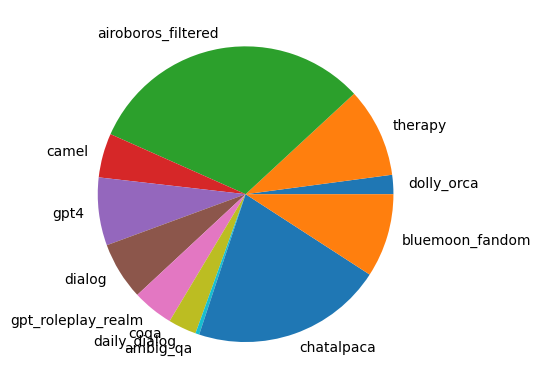

In [13]:
# multiplier_long = {
#     'dolly_orca': 200, # 5,
#     'therapy': 50, # 93,
#     'airoboros_filtered': 50, # 299,
#     'camel': 50, # 46,
#     'gpt4': 1, # 3529,
#     'dialog': 1000, # 3,
#     'gpt_roleplay_realm': 4, # 534,
#     'coqa': 0, # 108369,
#     'daily_dialog': 1, # 1465,
#     'ambig_qa': 100, # 2,
#     'chatalpaca': 1, # 9950,
#     'bluemoon_fandom': 1, # 4347,
# }

# import matplotlib.pyplot as plt
# import numpy as np

# # if using a Jupyter notebook, includue:
# %matplotlib inline

# splits_long = [
#     (name, length * multiplier_long[name])
#     for name, length
#     in long_dataset_lens.items()
# ]

# labels, y = zip(*splits_long)
# plt.pie(y, labels=labels)
# plt.show() 

In [14]:
# joined_long = concatenate_datasets([
#     ds
#     for name, dataset in long_datasets.items()
#     for ds in [dataset] * multiplier_long[name]
# ])

In [17]:
# joined_long = joined_long.remove_columns(
#     list(set(joined_long.column_names) - {'prompt', 'response'})
# ).shuffle(seed=42).train_test_split(0.15)

In [18]:
# joined_long.push_to_hub("julep-ai/samantha-dataset-v4-long-prompt_response", private=True)

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/41 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
dataset_lens = {
    name: len(dataset)
    for name, dataset in datasets.items()
}
dataset_lens

{'dolly_orca': 1667,
 'self_aware': 3369,
 'therapy': 95,
 'jokes': 15051,
 'openbookqa': 1209,
 'airoboros_filtered': 25714,
 'camel': 5601,
 'gpt4': 25921,
 'dialog': 43,
 'calendar': 111,
 'lima': 877,
 'gpt_roleplay_realm': 4536,
 'coqa': 7199,
 'daily_dialog': 13118,
 'ambig_qa': 12038,
 'chatalpaca': 20000,
 'bluemoon_fandom': 1041,
 'debater_evidence': 5783,
 'debater_argq': 23128,
 'intent': 4103,
 'function_explanation': 2768,
 'samsum': 16369}

In [7]:
multiplier = {
    'dialog': 400, # 43,
    'lima': 5, # 877
    'dolly_orca': 10, # 1667,
    'gpt4': 1, # 25921,
    'camel': 4, # 5601

    # 'toolformer': 4, # 7673,
    'self_aware': 1, # 3369,
    'therapy': 250, # 95,

    'jokes': 1, # 15051
    'openbookqa': 5, # 1209
    # 'airoboros_agent': 10, # 1000
    'airoboros_filtered': 1, # 25714
    'calendar': 50, # 111,
    'gpt_roleplay_realm': 1, # 4536
    'coqa': 1, # 7199
    'daily_dialog': 1, # 13118
    'ambig_qa': 1, # 12038
    'chatalpaca': 1, # 20000
    'bluemoon_fandom': 2, # 1041
    'debater_evidence': 1, #  5783,
    'debater_argq': 1, #  23128,
    'intent': 1, #  4103,
    'function_explanation': 1, #  2768,
    'samsum': 1, #  16369
}

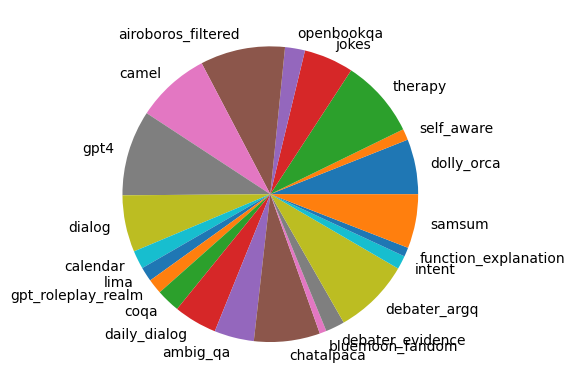

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# if using a Jupyter notebook, includue:
%matplotlib inline

splits = [
    (name, length * multiplier[name])
    for name, length
    in dataset_lens.items()
]

labels, y = zip(*splits)
plt.pie(y, labels=labels)
plt.show() 

In [10]:
def pluck(ls, keys):
    return [
        {k: d[k] for k in keys}
        for d in ls
    ]
    

def fix_dataset(ds):
    # Only keep chatml column
    ds = ds.remove_columns(list(set(ds.column_names) - {"chatml"}))

    # Make sure chatml conforms to the structure
    # ds = ds.map(lambda row: dict(chatml=pluck(row["chatml"], ["role", "content", "name"])))
    
    return ds
    

dataset_list = [
    fix_dataset(ds)
    for name, dataset in datasets.items()
    for ds in [dataset] * multiplier[name]
]

In [11]:
joined = concatenate_datasets(dataset_list)

In [12]:
joined = joined.map(batch_split, batched=True).remove_columns(["chatml"])

Map:   0%|          | 0/277183 [00:00<?, ? examples/s]

In [13]:
pr_joined = joined.map(transform_to_prompt_response).remove_columns(["prompt_chatml", "response_chatml"])

Map:   0%|          | 0/1318275 [00:00<?, ? examples/s]

In [14]:
pr_joined = pr_joined.shuffle(seed=42).train_test_split(0.15)

In [15]:
pr_joined.push_to_hub("julep-ai/samantha-dataset-v5-all-prompt_response", private=True)

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/9 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/125 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/125 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/125 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/125 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/125 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/125 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/125 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/125 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/125 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/2 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/99 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/99 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# raise 1//0

In [16]:
def calc_tokens(row):
    from transformers import AutoTokenizer

    tokenizer = AutoTokenizer.from_pretrained("julep-ai/StableBeluga-13B", use_fast=True, legacy=False)

    prompt = row['prompt']
    response = row['response']

    token_count = len(tokenizer.encode(prompt + response))
    return dict(token_count=token_count)

In [17]:
pr_joined_t = pr_joined.map(calc_tokens, num_proc=200)

Map (num_proc=200):   0%|          | 0/1120533 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (47974 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16517 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (42390 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8460 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (22870 > 4096). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence 

TimeoutError: 

In [ ]:
sum(pr_joined_t["train"]["token_count"])

In [ ]:
pr_joined_t = pr_joined_t.filter(lambda row: 1024 <= row["token_count"] <= 4096)

In [ ]:
len(pr_joined_t['train']) / len(pr_joined['train']), len(pr_joined_t['train']), len(pr_joined['train'])